In [2]:
import pandas as pd
# Cargar el dataset
ruta = ruta = "C:\\Users\\usuario\\OneDrive\\Escritorio\\UNAD UNVERIDAD\\sexto semestres\\Analisis de datos\\Tarea 3\\vino\\winequality-red.csv"

heart_df = pd.read_csv(ruta)

# Mostrar las primeras filas del dataset
print("Primeras filas del dataset:")
print(heart_df.head())

# Información del dataset
print("\nInformación del dataset:")
print(heart_df.info())

# Estadísticas descriptivas
print("\nEstadísticas descriptivas:")
print(heart_df.describe())

Primeras filas del dataset:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8    

In [4]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


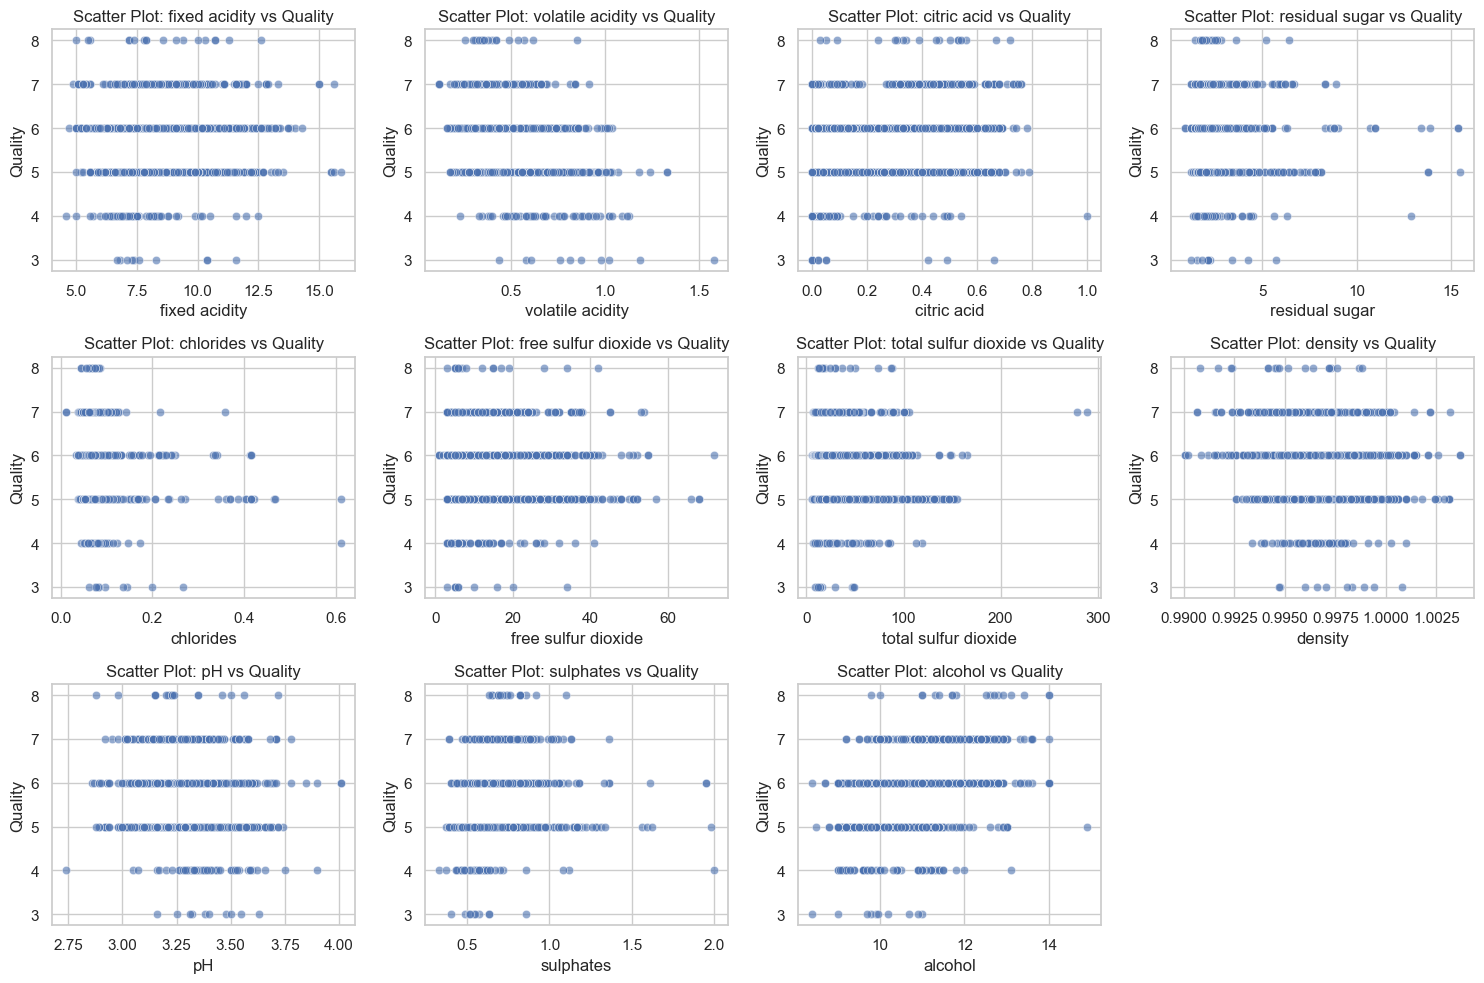

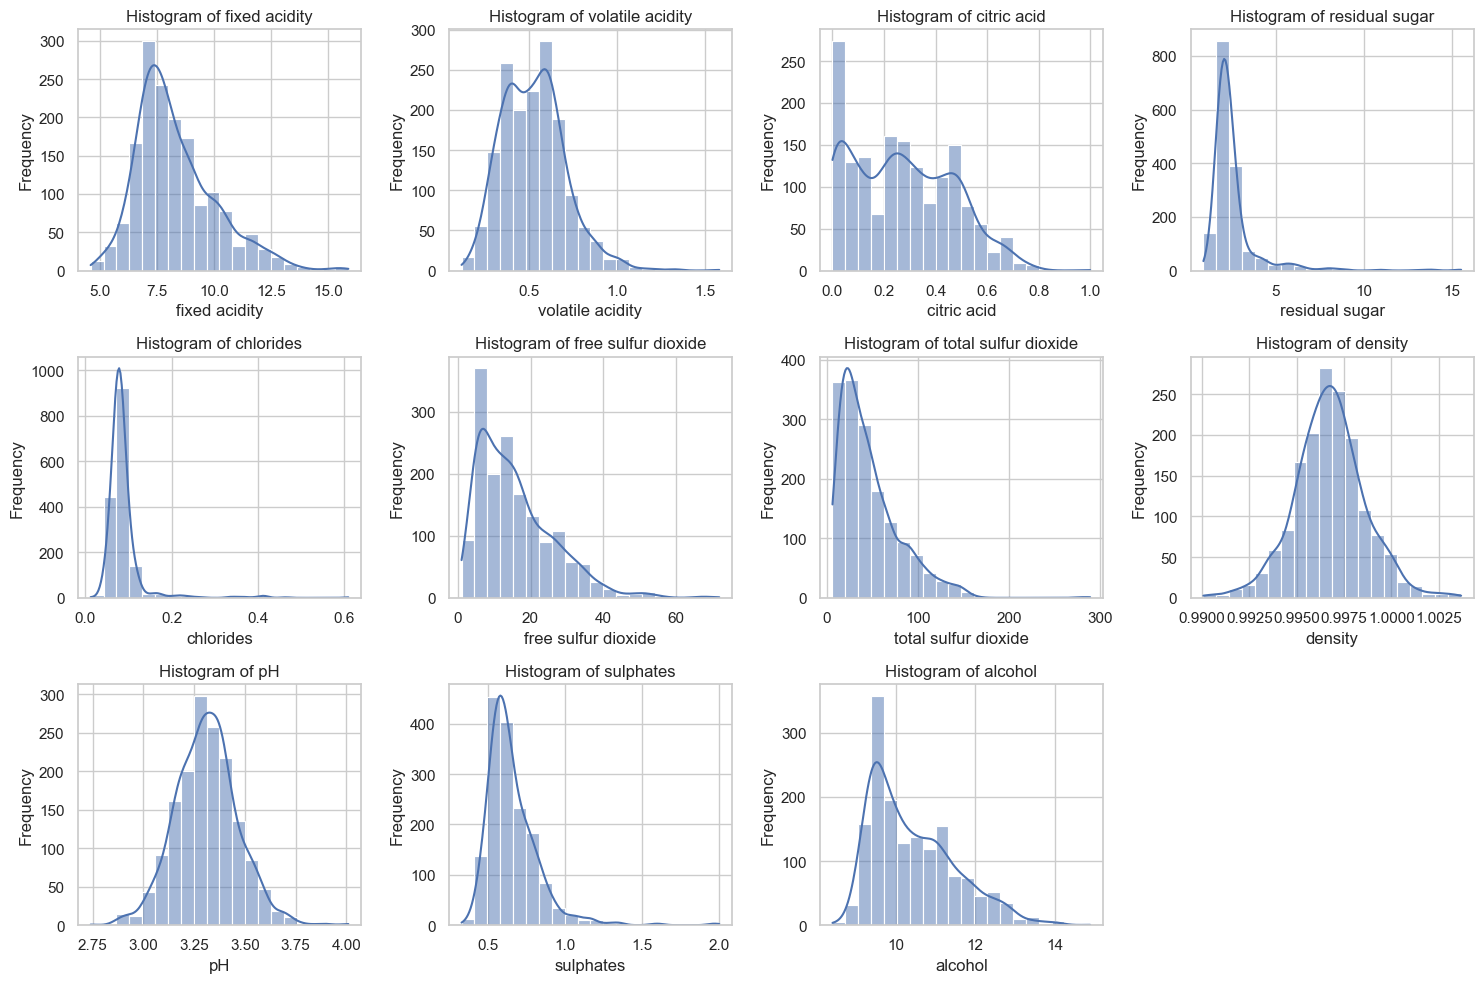

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Configurar estilo de los gráficos
sns.set(style="whitegrid")

# Gráficos de dispersión
features = heart_df.columns[:-1]  # Excluir la columna 'quality'
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    sns.scatterplot(data=heart_df, x=feature, y='quality', alpha=0.6)
    plt.title(f'Scatter Plot: {feature} vs Quality')
    plt.xlabel(feature)
    plt.ylabel('Quality')

plt.tight_layout()
plt.show()

# Histogramas de características
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)
    sns.histplot(heart_df[feature], bins=20, kde=True)
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


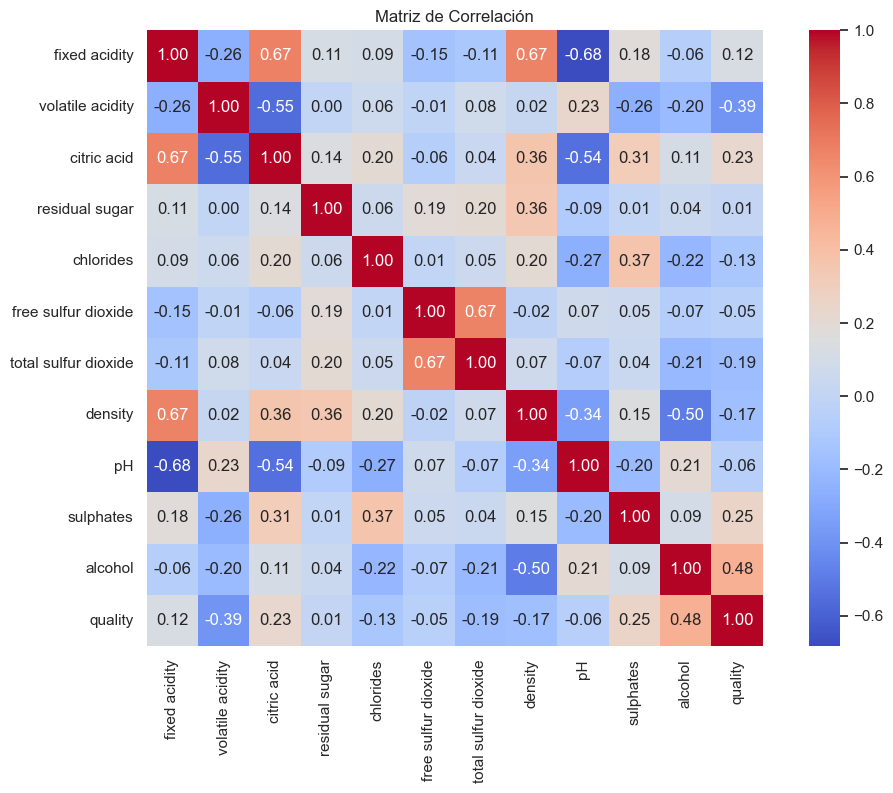

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Calcular la matriz de correlación
correlation_matrix = heart_df.corr()

# Imprimir la matriz de correlación
print(correlation_matrix['quality'].sort_values(ascending=False))

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correlación')
plt.show()

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definir las características (X) y la variable objetivo (y)
X = heart_df.drop('quality', axis=1)  # Características
y = heart_df['quality']                 # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

# Hacer predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Coeficientes de la regresión
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 0.39
R^2 Score: 0.40
                      Coefficient
fixed acidity            0.023085
volatile acidity        -1.001304
citric acid             -0.140821
residual sugar           0.006564
chlorides               -1.806503
free sulfur dioxide      0.005627
total sulfur dioxide    -0.003644
density                -10.351594
pH                      -0.393688
sulphates                0.841172
alcohol                  0.281890


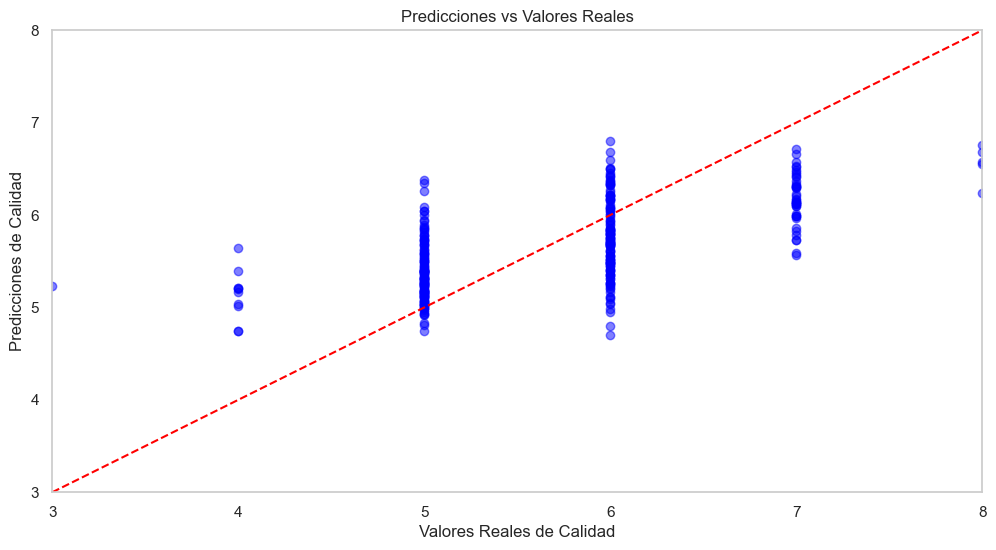

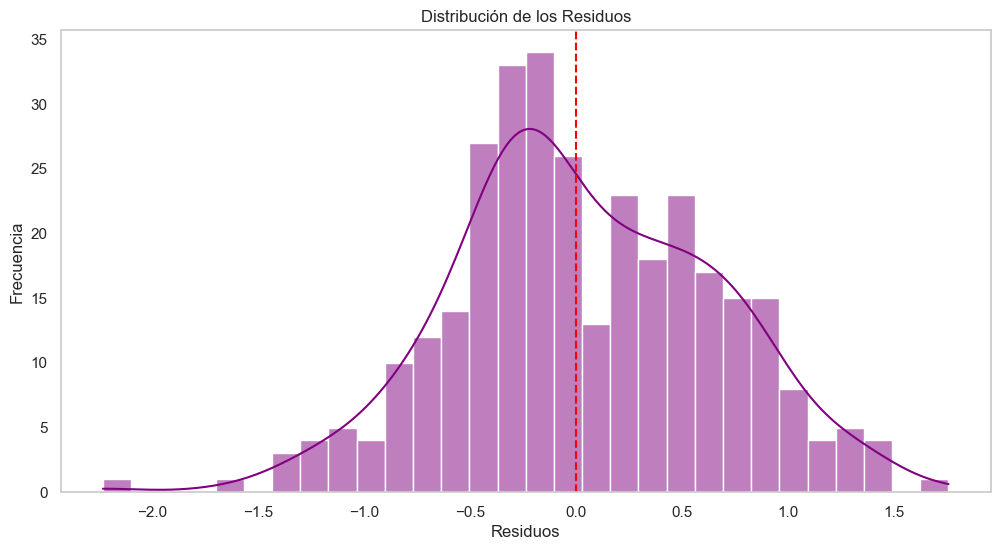

In [12]:
import seaborn as sns

# Configuración de estilo
sns.set(style='whitegrid')

# Graficar las predicciones frente a los valores reales
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Línea de referencia
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales de Calidad')
plt.ylabel('Predicciones de Calidad')
plt.xlim(y.min(), y.max())
plt.ylim(y.min(), y.max())
plt.grid()
plt.show()

# Graficar los residuos
residuals = y_test - y_pred

plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=30, kde=True, color='purple')
plt.title('Distribución de los Residuos')
plt.xlabel('Residuos')
plt.ylabel('Frecuencia')
plt.grid()
plt.axvline(0, color='red', linestyle='--')  # Línea en 0
plt.show()

Precisión del modelo: 0.74
Matriz de confusión:
[[107  34]
 [ 49 130]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.69      0.76      0.72       141
           1       0.79      0.73      0.76       179

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.75      0.74      0.74       320



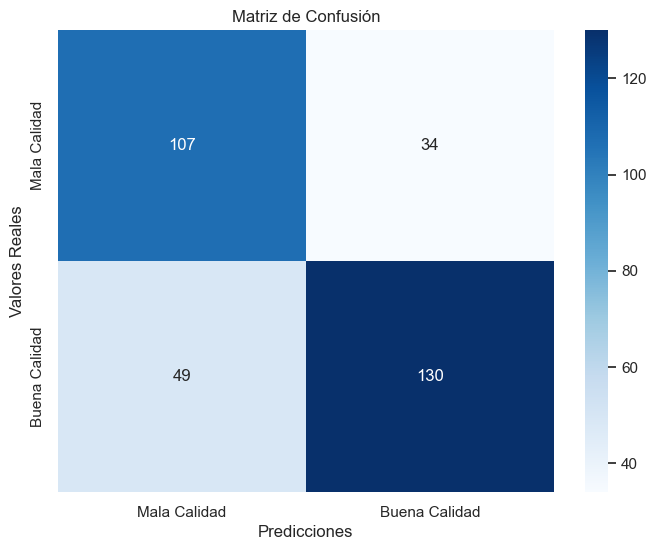

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# Convertir la variable de calidad en binaria (1 = buena calidad, 0 = mala calidad)
heart_df['quality'] = np.where(heart_df['quality'] >= 6, 1, 0)

# Definir características (X) y variable objetivo (y)
X = heart_df.drop('quality', axis=1)
y = heart_df['quality']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Precisión del modelo: {accuracy:.2f}')
print('Matriz de confusión:')
print(conf_matrix)
print('Reporte de clasificación:')
print(class_report)

# Visualizar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Mala Calidad', 'Buena Calidad'],
            yticklabels=['Mala Calidad', 'Buena Calidad'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores Reales')
plt.show()

quality                 1.000000
alcohol                 0.434751
sulphates               0.218072
citric acid             0.159129
fixed acidity           0.095093
residual sugar         -0.002160
pH                     -0.003264
free sulfur dioxide    -0.061757
chlorides              -0.109494
density                -0.159110
total sulfur dioxide   -0.231963
volatile acidity       -0.321441
Name: quality, dtype: float64


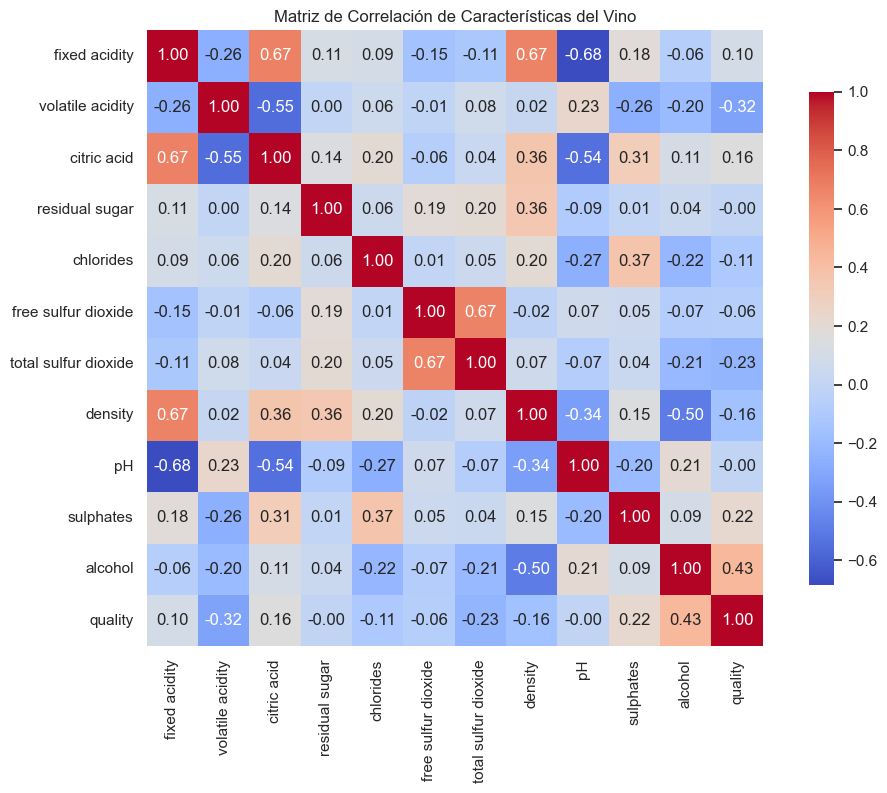

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



# Calcular la matriz de correlación
correlation_matrix = heart_df.corr()

# Mostrar la matriz de correlación
print(correlation_matrix['quality'].sort_values(ascending=False))

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación de Características del Vino')
plt.show()

In [18]:
# Aquí, se suma la acidez fija y la acidez volátil como un ejemplo
heart_df['total_acidity'] = heart_df['fixed acidity'] + heart_df['volatile acidity']

# Mostrar las primeras filas del DataFrame con la nueva columna de acidez total
print(heart_df[['fixed acidity', 'volatile acidity', 'total_acidity']].head())

   fixed acidity  volatile acidity  total_acidity
0            7.4              0.70           8.10
1            7.8              0.88           8.68
2            7.8              0.76           8.56
3           11.2              0.28          11.48
4            7.4              0.70           8.10


               total_acidity   quality
total_acidity       1.000000  0.063384
quality             0.063384  1.000000


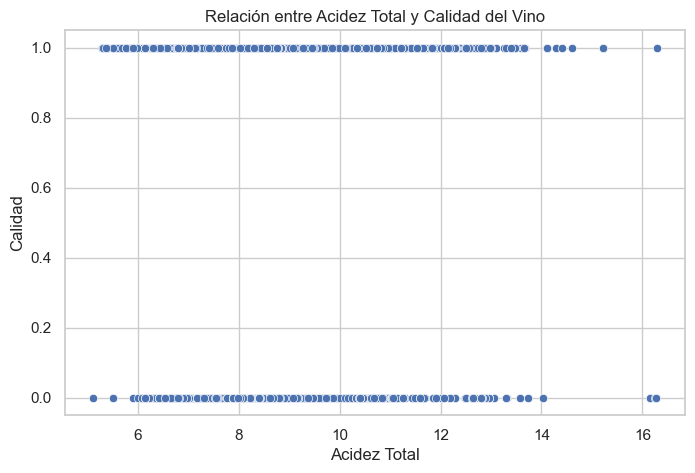

In [20]:
# Calcular la correlación de la acidez total con la calidad
correlation_acidity_quality = heart_df[['total_acidity', 'quality']].corr()
print(correlation_acidity_quality)

# Visualizar la relación entre acidez total y calidad
plt.figure(figsize=(8, 5))
sns.scatterplot(data=heart_df, x='total_acidity', y='quality')
plt.title('Relación entre Acidez Total y Calidad del Vino')
plt.xlabel('Acidez Total')
plt.ylabel('Calidad')
plt.show()

In [22]:
import pandas as pd



# Mostrar las primeras filas de la columna de alcohol
print(heart_df[['alcohol']].head())

# Calcular estadísticas descriptivas sobre el contenido de alcohol
print(heart_df['alcohol'].describe())

   alcohol
0      9.4
1      9.8
2      9.8
3      9.8
4      9.4
count    1599.000000
mean       10.422983
std         1.065668
min         8.400000
25%         9.500000
50%        10.200000
75%        11.100000
max        14.900000
Name: alcohol, dtype: float64


In [24]:
# Esto es solo un ejemplo; puedes ajustar la fórmula según la lógica que desees aplicar.
heart_df['adjusted_alcohol'] = heart_df['alcohol'] * (heart_df['fixed acidity'] / heart_df['fixed acidity'].mean())

# Mostrar las primeras filas con la nueva columna de alcohol ajustado
print(heart_df[['alcohol', 'adjusted_alcohol']].head())

   alcohol  adjusted_alcohol
0      9.4          8.360941
1      9.8          9.187901
2      9.8          9.187901
3      9.8         13.192883
4      9.4          8.360941


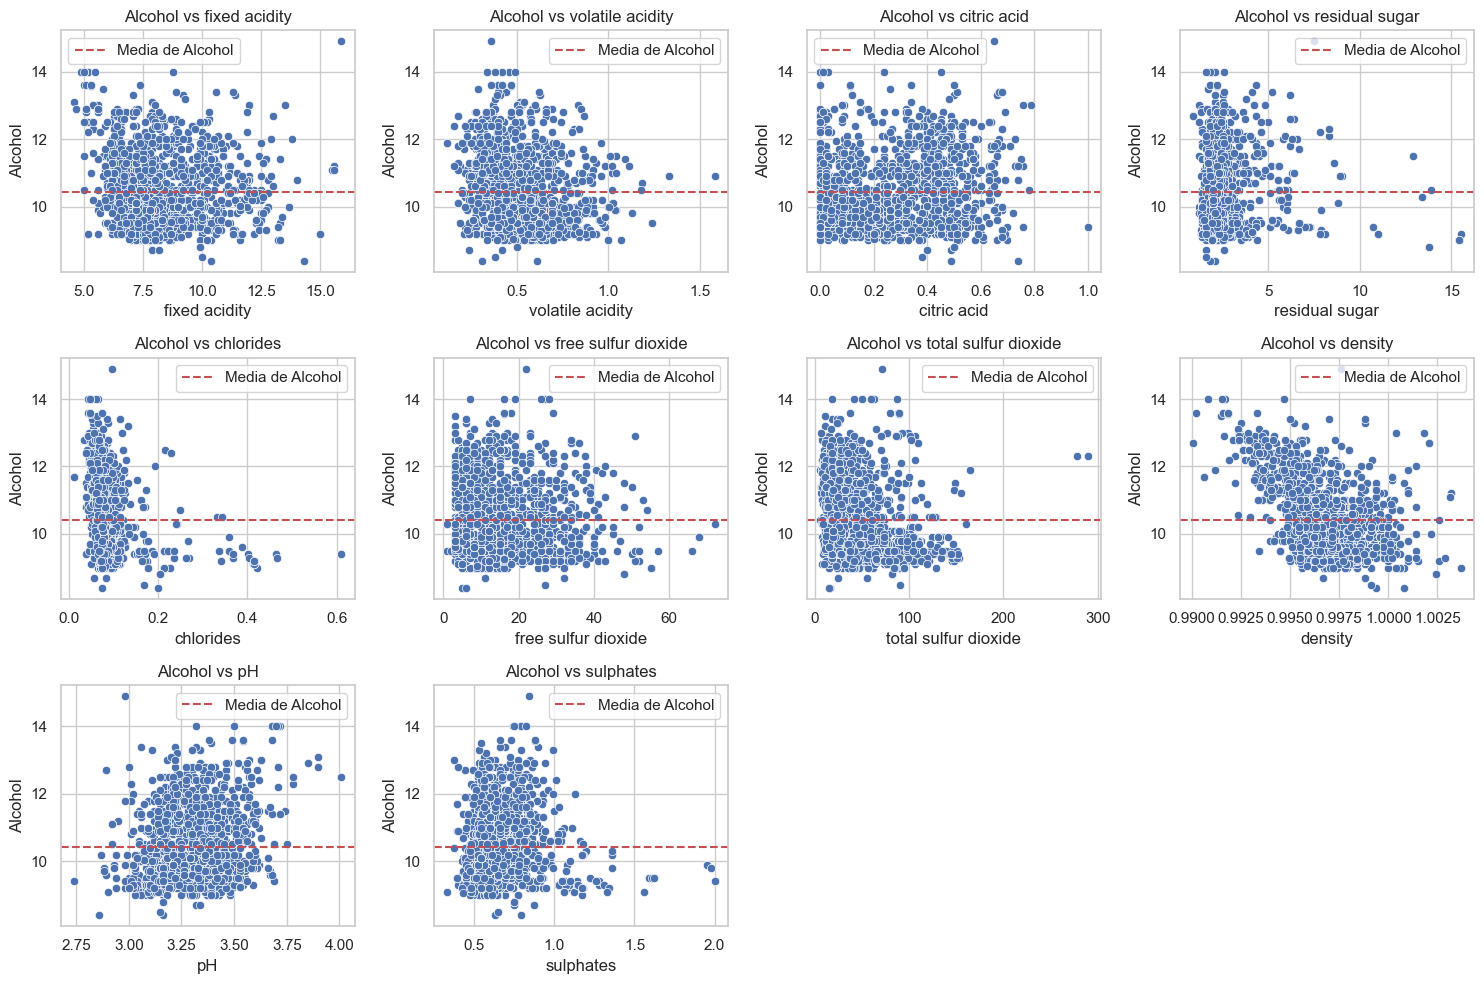

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer el estilo de los gráficos
sns.set(style="whitegrid")

# Crear gráficos de dispersión entre 'alcohol' y otras características
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
            'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 
            'pH', 'sulphates']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 4, i)  # Ajustar el tamaño de la cuadrícula
    sns.scatterplot(data=heart_df, x=feature, y='alcohol')
    plt.title(f'Alcohol vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Alcohol')
    plt.axhline(y=heart_df['alcohol'].mean(), color='r', linestyle='--', label='Media de Alcohol')
    plt.legend()

plt.tight_layout()
plt.show()

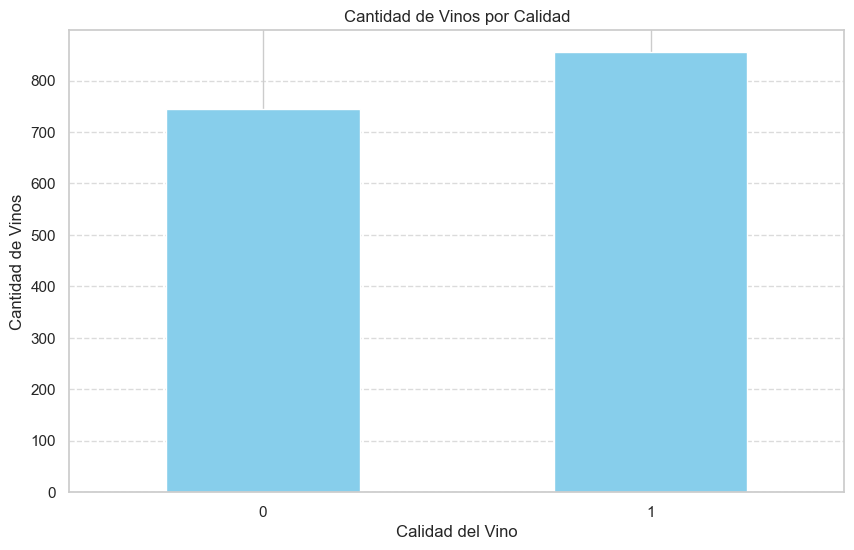

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Contar la cantidad de vinos en cada categoría de calidad
quality_counts = heart_df['quality'].value_counts().sort_index()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
quality_counts.plot(kind='bar', color='skyblue')
plt.title('Cantidad de Vinos por Calidad')
plt.xlabel('Calidad del Vino')
plt.ylabel('Cantidad de Vinos')
plt.xticks(rotation=0)  # Mantener las etiquetas en horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Crear un nuevo modelo con poda (limitando la profundidad)
model_podado = DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)

# Entrenar el modelo
model_podado.fit(X_train, y_train)

# Evaluar el rendimiento
y_pred_podado = model_podado.predict(X_test)

# Generar las métricas de rendimiento
from sklearn.metrics import classification_report, confusion_matrix

print("Matriz de confusión (modelo podado):\n", confusion_matrix(y_test, y_pred_podado))
print("\nReporte de clasificación (modelo podado):\n", classification_report(y_test, y_pred_podado))

Matriz de confusión (modelo podado):
 [[108  33]
 [ 54 125]]

Reporte de clasificación (modelo podado):
               precision    recall  f1-score   support

           0       0.67      0.77      0.71       141
           1       0.79      0.70      0.74       179

    accuracy                           0.73       320
   macro avg       0.73      0.73      0.73       320
weighted avg       0.74      0.73      0.73       320



In [38]:
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import matplotlib.pyplot as plt

# Suponiendo que ya tienes el DataFrame 'wine_df'
# Definir características (X) y variable objetivo (y)
X = heart_df.drop('quality', axis=1)  # Excluyendo la columna de calidad
y = heart_df['quality']

# Crear y entrenar el modelo de árbol de decisión
model = DecisionTreeRegressor(random_state=0)
model.fit(X, y)

# Obtener la importancia de las características
importances = model.feature_importances_

# Crear un DataFrame para las importancias
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Ordenar el DataFrame por importancia
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar el DataFrame de importancias
print(importance_df)

                 Feature  Importance
10               alcohol    0.250133
6   total sulfur dioxide    0.114452
9              sulphates    0.111717
1       volatile acidity    0.084626
12      adjusted_alcohol    0.073115
5    free sulfur dioxide    0.071588
2            citric acid    0.066531
4              chlorides    0.061069
7                density    0.049876
3         residual sugar    0.049033
11         total_acidity    0.028598
8                     pH    0.024885
0          fixed acidity    0.014377


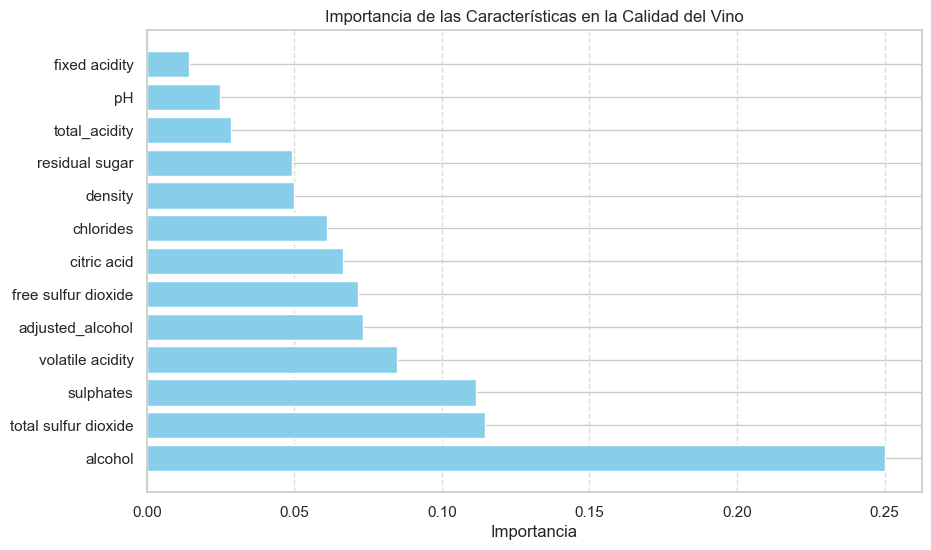

In [40]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importancia')
plt.title('Importancia de las Características en la Calidad del Vino')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

In [42]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report

# 1. Crear un DataFrame simulado (si no tienes 'wine_data.csv')
# Aquí creamos un DataFrame con datos aleatorios
np.random.seed(42)
wine_df = pd.DataFrame({
    'fixed_acidity': np.random.rand(100),
    'volatile_acidity': np.random.rand(100),
    'citric_acid': np.random.rand(100),
    'residual_sugar': np.random.rand(100),
    'chlorides': np.random.rand(100),
    'free_sulfur_dioxide': np.random.rand(100),
    'total_sulfur_dioxide': np.random.rand(100),
    'density': np.random.rand(100),
    'ph': np.random.rand(100),
    'sulphates': np.random.rand(100),
    'alcohol': np.random.rand(100),
    'quality': np.random.randint(3, 9, size=100)  # Valores de calidad entre 3 y 8
})

# 2. Seleccionar características y variable objetivo
X = wine_df.drop('quality', axis=1)  # Todas las columnas excepto 'quality'
y = wine_df['quality']  # Variable objetivo

# 3. Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}, {y_train.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}, {y_test.shape}")

# 4. Entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# 5. Hacer predicciones y evaluar el modelo
y_pred = model.predict(X_test)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

# Reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de clasificación:")
print(report)

Dimensiones del conjunto de entrenamiento: (90, 11), (90,)
Dimensiones del conjunto de prueba: (10, 11), (10,)
Matriz de confusión:
[[0 1 1 0 1]
 [2 1 0 0 0]
 [0 0 0 0 0]
 [0 0 2 0 0]
 [0 0 1 0 1]]
Reporte de clasificación:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         3
           4       0.50      0.33      0.40         3
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         2
           7       0.50      0.50      0.50         2

    accuracy                           0.20        10
   macro avg       0.20      0.17      0.18        10
weighted avg       0.25      0.20      0.22        10



C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\usuario\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\usuario\anaconda3\Lib\site-packag

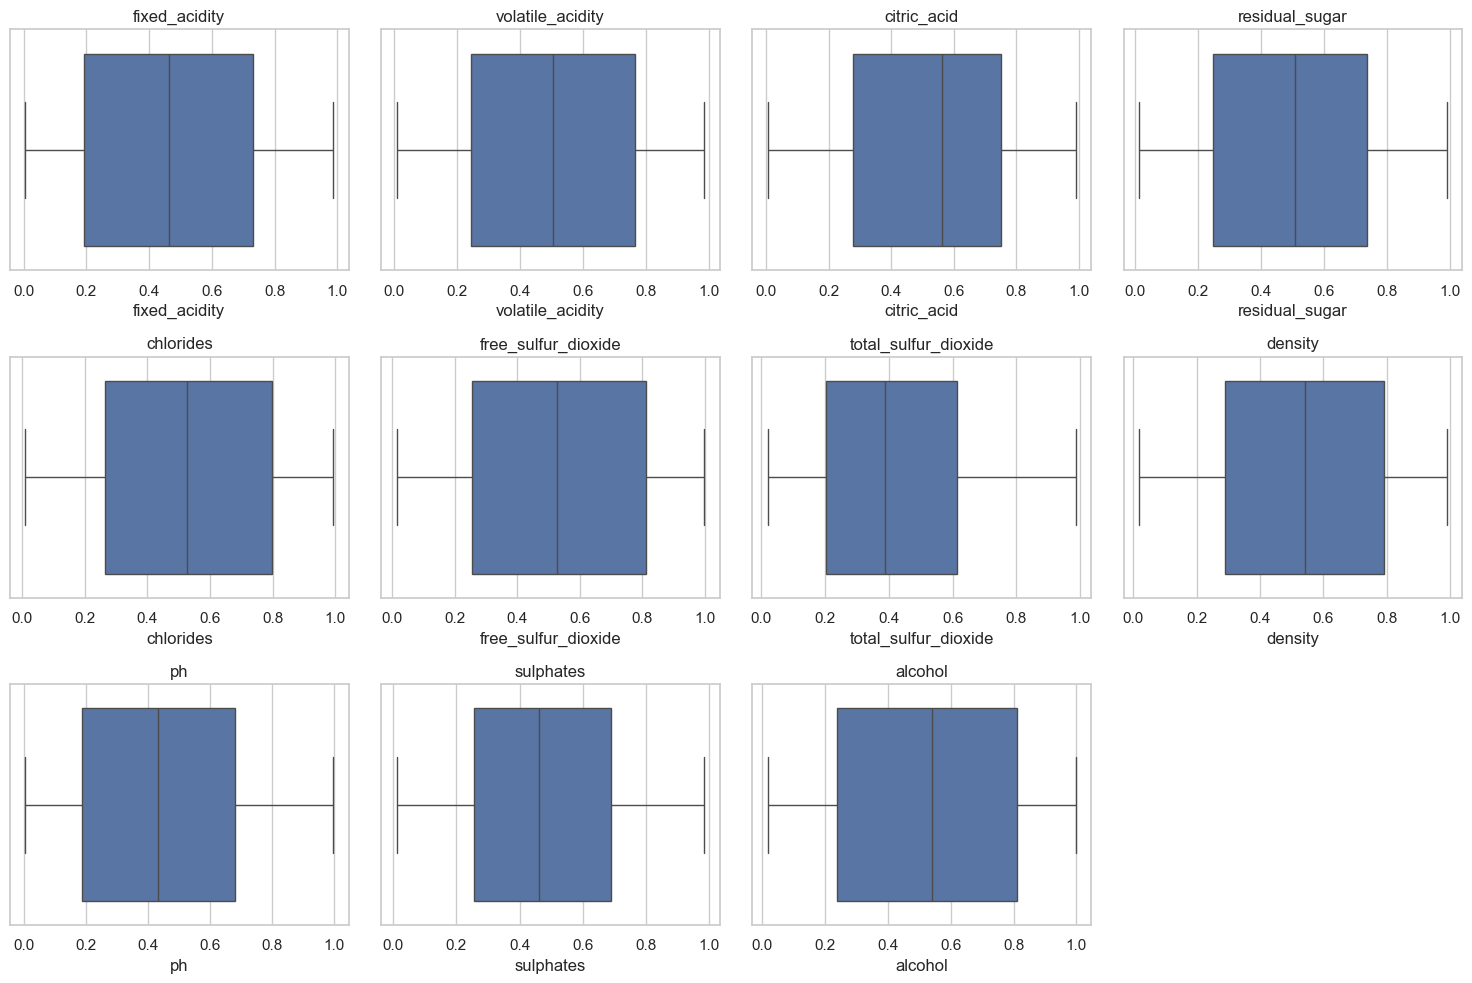

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un boxplot para cada característica
plt.figure(figsize=(15, 10))
for i, feature in enumerate(wine_df.columns[:-1], 1):  # Excluir 'quality'
    plt.subplot(3, 4, i)  # Ajusta el tamaño de la cuadrícula según sea necesario
    sns.boxplot(x=wine_df[feature])
    plt.title(feature)
plt.tight_layout()
plt.show()

In [46]:
# Calcular el rango intercuartílico (IQR) para cada característica
def detect_outliers_iqr(df):
    outliers = {}
    for column in df.columns:
        if df[column].dtype in ['float64', 'int64']:  # Solo para columnas numéricas
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detectar outliers en el DataFrame
outliers_dict = detect_outliers_iqr(wine_df)

# Mostrar resultados
for feature, outliers in outliers_dict.items():
    print(f"Valores atípicos para {feature}:")
    print(outliers[[feature]])
    print("\n")

Valores atípicos para fixed_acidity:
Empty DataFrame
Columns: [fixed_acidity]
Index: []


Valores atípicos para volatile_acidity:
Empty DataFrame
Columns: [volatile_acidity]
Index: []


Valores atípicos para citric_acid:
Empty DataFrame
Columns: [citric_acid]
Index: []


Valores atípicos para residual_sugar:
Empty DataFrame
Columns: [residual_sugar]
Index: []


Valores atípicos para chlorides:
Empty DataFrame
Columns: [chlorides]
Index: []


Valores atípicos para free_sulfur_dioxide:
Empty DataFrame
Columns: [free_sulfur_dioxide]
Index: []


Valores atípicos para total_sulfur_dioxide:
Empty DataFrame
Columns: [total_sulfur_dioxide]
Index: []


Valores atípicos para density:
Empty DataFrame
Columns: [density]
Index: []


Valores atípicos para ph:
Empty DataFrame
Columns: [ph]
Index: []


Valores atípicos para sulphates:
Empty DataFrame
Columns: [sulphates]
Index: []


Valores atípicos para alcohol:
Empty DataFrame
Columns: [alcohol]
Index: []




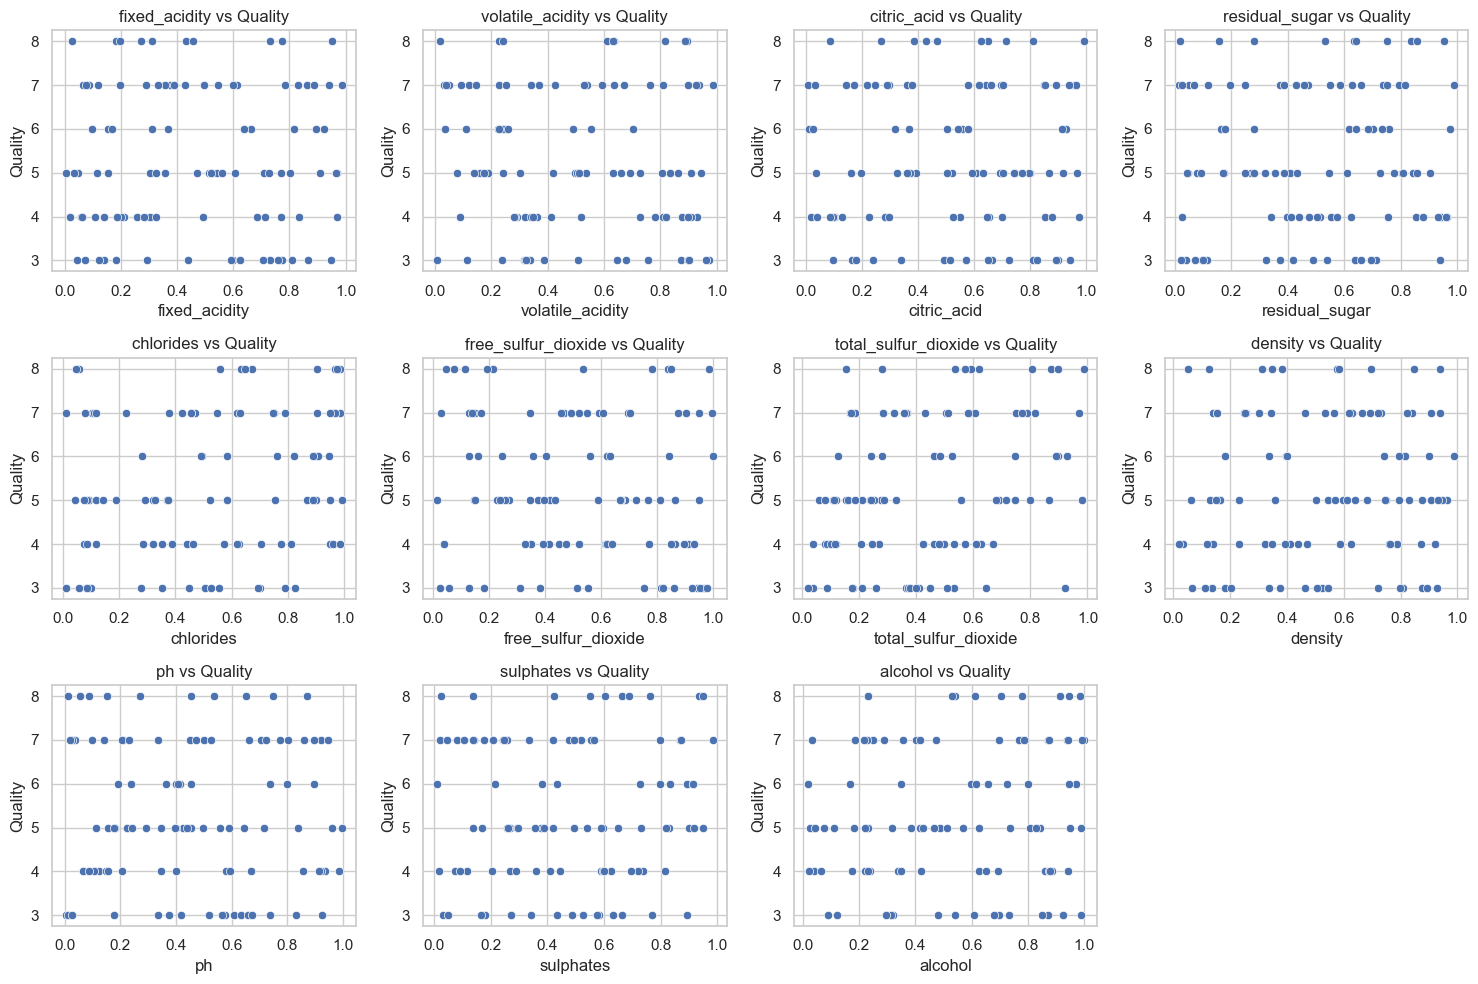

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear gráficos de dispersión para cada par de características
plt.figure(figsize=(15, 10))
for i, feature in enumerate(wine_df.columns[:-1], 1):  # Excluir 'quality'
    plt.subplot(3, 4, i)
    sns.scatterplot(x=wine_df[feature], y=wine_df['quality'])  # Relación con la calidad
    plt.title(f'{feature} vs Quality')
    plt.xlabel(feature)
    plt.ylabel('Quality')
plt.tight_layout()
plt.show()

Error cuadrático medio (MSE): 2.58
R²: -0.05


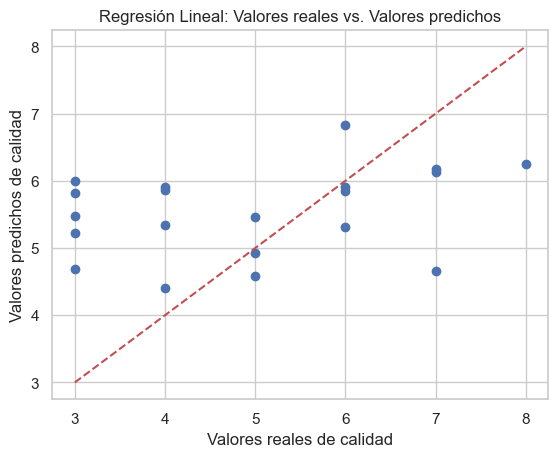

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definir las características (X) y la variable objetivo (y)
X = wine_df.drop('quality', axis=1)  # Características
y = wine_df['quality']                # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Calcular el error cuadrático medio y el coeficiente de determinación R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f'Error cuadrático medio (MSE): {mse:.2f}')
print(f'R²: {r2:.2f}')

# Graficar los resultados
plt.scatter(y_test, y_pred)
plt.xlabel('Valores reales de calidad')
plt.ylabel('Valores predichos de calidad')
plt.title('Regresión Lineal: Valores reales vs. Valores predichos')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Línea de 45 grados
plt.show()